In [44]:
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
# Imports
import modules.imports as imports
import modules.visualisation as Visualisation   

# I. IMPORT DES DONNEES

## Team dataframe

In [39]:
teamdf = imports.create_teams_df()
teamdf
# teamdf.to_json('teamdf.json', orient='records')

,idteam,name
0,14,Liverpool
1,45,Norwich
2,91,Bournemouth
3,49,Sheffield
4,90,Burnley
...,...,...
5680,1737,Cadix
5691,2894,Huesca
6428,2000,Benevento
6433,744,Crotone


## Player dataframe

In [40]:
playerdf = imports.create_players_df()
playerdf
# playerdf.to_json('playerdf.json', orient='records')

,idplayer,lastname
0,15157,Milner
1,41733,Wijnaldum
2,56979,Henderson
3,60706,Adrián
4,60914,Matip
...,...,...
142256,173131,Haraslín
142280,518924,Bertini
142389,539223,Bertola
142390,539226,Pietra


## Match dataframe

In [41]:
matchdf = imports.create_matches_df()
matchdf
# matchdf.to_json('matchdf.json', orient='records')

AttributeError: 'int' object has no attribute 'get'

## Highlight dataframe

In [ ]:
highlightsdf = imports.create_highlight_df()
highlightsdf
# highlightsdf.to_json('highlightsdf.json', orient='records')

,matchid,time,playerid,type
0,match_1059702,86,0,substitution
1,match_1059702,83,0,substitution
2,match_1059702,74,0,substitution
3,match_1059702,70,0,substitution
4,match_1059702,65,195546,yellow
...,...,...,...,...
50475,match_2137741,54,487053,yellow
50476,match_2137741,41,0,substitution
50477,match_2137741,38,141925,yellow
50478,match_2137741,32,430848,yellow


## Substitution dataframe

In [ ]:
substitutiondf = imports.create_substitutions_df()
substitutiondf
# substitutiondf.to_json('substitutiondf.json', orient='records')

,matchid,time,on_playerid,off_playerid,reason
0,match_1059702,39,60706,116535,Injury
1,match_1059702,74,110979,152760,Tactical
2,match_1059702,86,15157,92217,Tactical
3,match_1059702,58,87396,71738,Tactical
4,match_1059702,70,89470,90440,Tactical
...,...,...,...,...,...
25320,match_2137741,41,487053,141925,Injury
25321,match_2137741,63,94239,459089,Tactical
25322,match_2137741,63,192905,50401,Tactical
25323,match_2137741,76,483988,90557,Tactical


## Match Players dataframe


In [ ]:
matchdf_players = imports.create_match_players_df()
matchdf_players
# matchdf_players.to_json('match_playersdf.json', orient='records')

,matchid,teamid,playerid,position,formation_place,quotation_player,final_mark_2015,play_duration,touches,total_offside,...,bad_keeper_sweeper_point,six_second_violation_point,cross_not_claimed_point,penalty_save_point,assist_pass_lost,assist_handball_won,assist_free_kick_won,assist_penalty_won,pen_goals_conceded,pen_goals_conceded_point
0,match_1059702,14,15157,Midfielder,0,3.75,5.0,4,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,match_1059702,14,41733,Midfielder,8,4.40,5.5,90,49.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,match_1059702,14,56979,Midfielder,7,5.75,6.0,90,73.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,match_1059702,14,60706,Goalkeeper,0,0.00,4.5,51,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,match_1059702,14,60914,Defender,0,9.50,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142495,match_2137741,126,433734,Defender,0,0.00,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142496,match_2137741,126,459089,Goalkeeper,1,0.00,4.0,63,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142497,match_2137741,126,470501,Forward,0,4.65,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142498,match_2137741,126,483988,Defender,0,18.00,5.0,14,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# II. HISTORIQUE DES TRANSFERS 

In [ ]:
histoiquedf = imports.create_historique_transferts_df()
histoiquedf
histoiquedf.to_json('historiquedf.json', orient='records')

# III. REQUETES 

## A. Clubs 

In [ ]:
# • Afficher la liste de tous les clubs (idteam et nom du club) / Display the list of all teams in the dataframe
print(teamdf)

# • Convert 'idteam' column to integers
teamdf['idteam'] = teamdf['idteam'].astype(int)

# • Quel est le nom du club dont l'id est 43 ? / Display the club with where id = 43
print(teamdf[teamdf['idteam'] ==43])

# • Quel est le nombre total de clubs ? / Display the length of the team dataframe
print(len(teamdf))

     idteam         name
0        14    Liverpool
1        45      Norwich
2        91  Bournemouth
3        49    Sheffield
4        90      Burnley
...     ...          ...
5680   1737        Cadix
5691   2894       Huesca
6428   2000    Benevento
6433    744      Crotone
6445   2036       Spezia

[111 rows x 2 columns]
    idteam       name
15      43  Man. City
111


## B. Joueurs

In [ ]:
# • Afficher la liste des joueurs / List of all players
print(playerdf)

# • Quel est le nombre total de joueurs ? / Display the length of the player dataframe
print(len(playerdf))

       idplayer   lastname
0         15157     Milner
1         41733  Wijnaldum
2         56979  Henderson
3         60706     Adrián
4         60914      Matip
...         ...        ...
142256   173131   Haraslín
142280   518924    Bertini
142389   539223    Bertola
142390   539226     Pietra
142453   538794      Basha

[4503 rows x 2 columns]
4503


## C. Matchs

In [ ]:
# • Afficher la liste des matchs joués / List of all matches
print(matchdf)

# • Afficher tous les id des matchs où le club à domicile est Arsenal / Display all match ids where the home team is Arsenal
matchdf['hometeam'] = matchdf['hometeam'].astype(str)
arsenal_home_matches = matchdf[matchdf['hometeam'] == 'Arsenal']['matchid']
print(arsenal_home_matches)

# • Afficher les information du/des match(s) qui se sont déroulés le 11-08-2019. / Display the information of the match(es) that took place on 11-08-2019. 
matchdf['date'] = imports.pd.to_datetime(matchdf['date'])
print(matchdf[matchdf['date'].dt.date == imports.pd.to_datetime('2019-08-11').date()])

# • Combien de matchs ont eu lieu en 2019 ? / How many matches took place in 2019?
print(len(matchdf[matchdf['date'].dt.year == 2019]))

# • Combien de matchs a joué le club Liverpool ? / How many matches did Liverpool play?
print(len(matchdf[(matchdf['hometeam'] == 'Liverpool') | (matchdf['awayteam'] == 'Liverpool')]))


            matchid        hometeam       awayteam                  date  \
0     match_1059702       Liverpool        Norwich  2019-08-09T19:00:00Z   
1     match_1059703     Bournemouth      Sheffield  2019-08-10T14:00:00Z   
2     match_1059704         Burnley    Southampton  2019-08-10T14:00:00Z   
3     match_1059705  Crystal Palace        Everton  2019-08-10T14:00:00Z   
4     match_1059706       Leicester  Wolverhampton  2019-08-11T13:00:00Z   
...             ...             ...            ...                   ...   
3589  match_2137737        Atalanta          Milan  2021-05-23T18:45:00Z   
3590  match_2137738       Sampdoria          Parma  2021-05-22T18:45:00Z   
3591  match_2137739          Spezia           Roma  2021-05-23T18:45:00Z   
3592  match_2137740           Inter        Udinese  2021-05-23T13:00:00Z   
3593  match_2137741          Napoli         Verona  2021-05-23T18:45:00Z   

      duration    period  chamionship  quotation_away  quotation_home  \
0           93

# IV. ANALYSE ET VISUALISATION GRAPHIQUE 

## A. Résultats en fonction du club

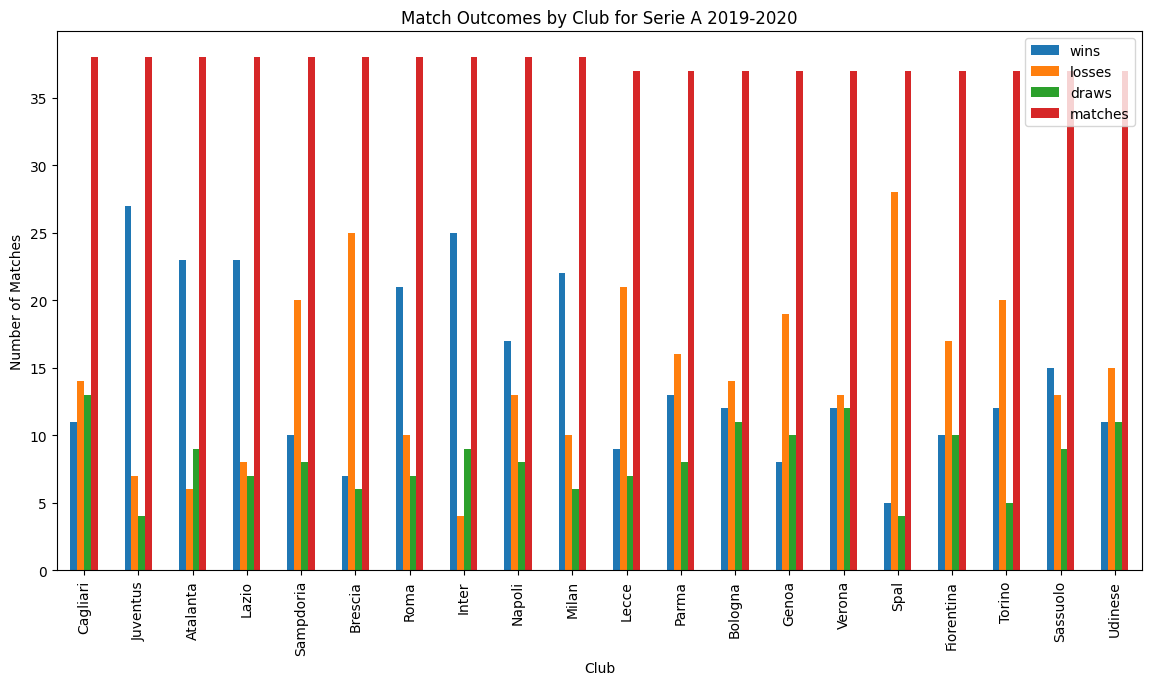

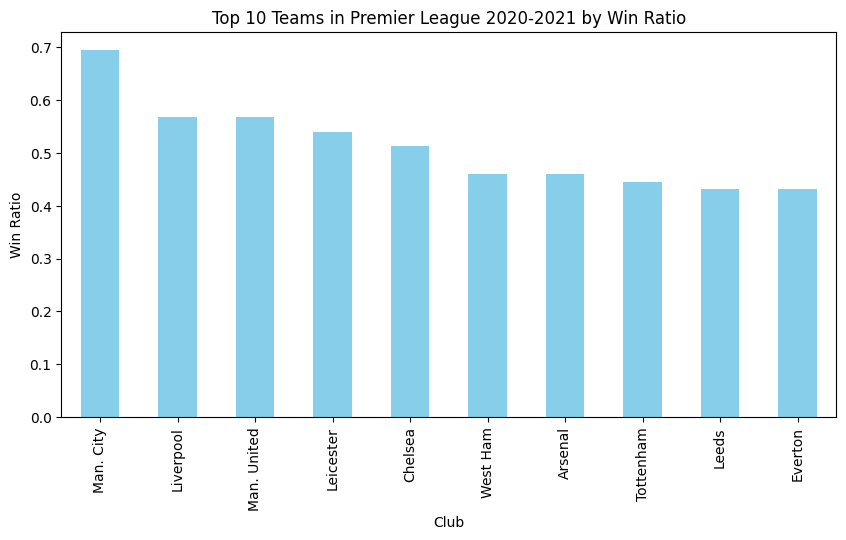

In [47]:
"""
• Afficher le nombre de matchs par club pour le championnat 5 pour la saison 
2019-2020 (dont victoire, défaite, math nul) (visualisation) Les dates du 
championnat 5 (Série A) pour la saison 2019-2020 sont 24 août 2019 - 2 août 
2020 
"""
# Apply the function for Serie A 2019-2020
serie_a_results = Visualisation.analyze_matches(matchdf, '2019-08-24', '2020-08-02', 5)

# Plotting
serie_a_results.sort_values('matches', ascending=False).plot(kind='bar', figsize=(14, 7))
Visualisation.plt.title('Match Outcomes by Club for Serie A 2019-2020')
Visualisation.plt.xlabel('Club')
Visualisation.plt.ylabel('Number of Matches')
Visualisation.plt.show()
"""
• Afficher les 10 meilleures équipes pour le championnat 2 de la saison 2020
2021 (celles avec le meilleur ratio victoire/matchs joués) Les dates du 
championnat 2 (Premier League) pour la saison 2020-2021 sont du 12 
septembre 2020 au 23 mai 2021.
"""

# Apply the function for Premier League 2020-2021
pl_results = Visualisation.analyze_matches(matchdf, '2020-09-12', '2021-05-23', 2)
pl_results['win_ratio'] = pl_results['wins'] / pl_results['matches']

# Determine top 10 teams based on win ratio
top_teams = pl_results.sort_values('win_ratio', ascending=False).head(10)

# Plotting
top_teams['win_ratio'].plot(kind='bar', color='skyblue', figsize=(10, 5))
Visualisation.plt.title('Top 10 Teams in Premier League 2020-2021 by Win Ratio')
Visualisation.plt.xlabel('Club')
Visualisation.plt.ylabel('Win Ratio')
Visualisation.plt.show()